<div style="width:image width px; font-size:60%; text-align:right;">
    <img src="img/karsten-wurth-0w-uTa0Xz7w-unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Karsten Wurth on Unsplash</figcaption>
</div>

# Renewable energy in the European Union

**Wrangling and cleansing real data from the EU Comission**

*Neli Garkova*



## Table of contents

* [Introduction](#intro)
* [Business understanding](#businessunderstanding)
* [Data understanding](#dataunderstanding)
* [Data Preperation](#dataprep)
    * [Data cleansing](#datacleansing)
        * [Libraries and settings](#libraries)
        * [Data allocation and preparation](#allocationandprep)
* [Development of the production of primary energy (by fuel type)](#devproduction)
* [Development of renewable Energy in EU ](#devrenewables)
* [Evolution of the renewables share in net public electricity generation](#evolutionrenewables)
* [Electricity production from renewable resources in the EU Member States (2018)](#renewableseu)
* [Europe’s top five  wind and solar power producing countries](#topfive)
* [Growth of solar electricity capacity for major EU countries](#growthsolar)
* [Visualisation of solar energy production in the EU for 2018](#geomap)
* [References](#references)

# Introduction <a class="anchor" id="intro"></a>

Renewable energy nowadays is one of the most important fields regarding energy production. As we all know the importance of this type of energy for the environment and future generations is extremely valuable. For that reason  I decided to do a small analysis on the total energy from renewable sources and then analyse the wind and solar productionin the european countries.

The data is provided by European Comission and contains the total energy production of 28 EU contries between 1990 and 2018. The data was last update on 20 March 2020.

I organize the data between the selected group of countries and visualize the results. The visualization process starts with the Wind energy production, in where you can see a trend of some countries leading race. After, comes the Solar energy production and is very interesting to compare the countries that are leading in the Solar production with the Wind energy production. But, the most important visualization is the Nuclear Energy production and the contrast between all the energy production sources.

# Business Understanding <a class="anchor" id="businessunderstanding"></a>

Renewable energy plays an important and growing role in the energy system of the European Union. Renewable energy resources (RER) are seen as option to reduce EU's energy dependence on imported energy and provide social and environmental benefits. In 2009 the Renewables Directive set binding targets for all EU Member States, such that the EU will reach a 20% share of energy from renewable sources by 2020 and a 10% share of renewable energy specifically in the transport [[1] Maintaining an overview of the current state of the renewable energies' performances in the European Union is crucial for making informed decisions—ranging from policy and investment decisions to reliable power sector planning. Decisions that are data-driven reflect appropriate ambition, maximize cost- effectiveness, and enable successful implementation of renewable energy investments.


# Data Understanding <a class="anchor" id="dataunderstanding"></a>

The dataset is very well-structured and of high-quality. It provides an annual overview of energy-related statistics in the EU and in individual EU countries for the period from 1990 to 2018.
It consist of 33 sheets with 14 206 table entries and includes information such as data on production, consumption, greenhouse gas emissions, imports, and brief socio-economic statistics.




# Data preperation <a class="anchor" id="dataprep"></a>

## Data cleansing  <a class="anchor" id="datacleansing"></a>

The following goals of data cleansing are addressed in this notebook:
* Import an Excel-file
* Inspect the dataset
* Check data types and do meaningful modifications
* Handle missings

### Libraries and settings  <a class="anchor" id="libraries"></a>

Loading the necessary libraries.

In [47]:
# Array operations and useful analysis functionalities
import numpy as np
import pandas as pd

# Libraries for visualisations in the notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for mapping 
import geopandas as gpd
import geoplot
import mapclassify

### Data allocation and preparation <a class="anchor" id="allocationandprep"></a>


The Excel files are read with pandas. The  first sheet contains information about 28 EU countries with following sections:
* Summary of energy balances
* Electricity production and infrastructure
* Electricity and gas market indicators
* Heat production (heat sold)
* Cogeneration heat and power
* Transport fuels
* Main energy indicators
* Greenhouse gas emissions
* GDP and population


The other sheets cover a detailed information of every european country, including the UK.

**Loading the data**

In [2]:
df = pd.read_excel('data/countrydatasheets_march_2020.xlsx', # file name
                   'EU28',                                   # index of sheet in file
                   header=7,                                 # row index of column names
                   usecols='C:AF')                           # column index

df.head(5)

,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Energy Balance [Mtoe],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Production,950.12,942.15,929.9,934.05,949.92,965.29,993.6,985.25,957.77,...,825.65,843.67,812.32,804.94,798.64,780.85,775.92,761.3,760.14,756.87
4,Solid fossil fuels,360.37,335.97,316.47,291.48,269.88,272.67,264.99,260.59,232.36,...,160.9,158.18,161.15,161.85,149.08,143,139.4,127.64,124.97,118.36


In [3]:
# Transforming the data 
# Cleaning white spaces and renaming columns 

#Renaming Index
df.rename(columns={'Unnamed: 2':'Year'}, inplace=True)  #renaming Index

# Replacing white spaces with NaNs
df=df.replace(r'^\s*$', np.nan, regex=True)

#Transpose the table
df = df.T
df = df.reset_index(level=0)
df.columns = df.iloc[0] # header 
df = df.drop(df.index[0])
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df = df.dropna(axis='columns')

df.head()


,Year,Production,Solid fossil fuels,of which hard coal,of which brown coal,Peat and peat products,Oil shale and oil sands,Oil and petroleum products,of which crude oil,Natural gas,...,Others,Industry,Transport,Households,Services,Agriculture and Fishing,Other,Total Population [thousands of people],GDP2010 [Mrd EUR at 2010 exchange rates],GDP-market prices [Mrd EUR at current prices]
0,1990,950.12,360.37,220.35,140.02,3.75,4.83,136.02,133.48,163.99,...,0.002,0.3306,0.2518,0.2652,0.1071,0.0335,0.0117,475188,8976.3,6094.34
1,1991,942.15,335.97,211.49,124.48,2.75,4.22,134.74,132.1,174.11,...,0.0022,0.3109,0.2523,0.2792,0.1111,0.0335,0.013,476842,9075.24,6380.34
2,1992,929.9,316.47,201.83,114.64,3.31,4.05,137.95,135.38,173.12,...,0.0025,0.3,0.2658,0.2788,0.111,0.0325,0.0119,477925,9152.03,6623.86
3,1993,934.05,291.48,181.23,110.25,2.66,3.21,144.13,141.62,184.09,...,0.0026,0.2911,0.2671,0.2873,0.1106,0.0323,0.0116,479562,9136.34,6735.58
4,1994,949.92,269.88,166,103.88,3.83,3.12,180.87,178.46,183.33,...,0.003,0.2955,0.2714,0.2792,0.1116,0.0321,0.0102,480893,9394.88,7064.21


In [4]:
# Basic statistics of all columns
df.describe(include = 'all')

,Year,Production,Solid fossil fuels,of which hard coal,of which brown coal,Peat and peat products,Oil shale and oil sands,Oil and petroleum products,of which crude oil,Natural gas,...,Others,Industry,Transport,Households,Services,Agriculture and Fishing,Other,Total Population [thousands of people],GDP2010 [Mrd EUR at 2010 exchange rates],GDP-market prices [Mrd EUR at current prices]
count,29,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,...,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0,29.00,29.00
unique,29,29.00,29.00,29.00,29.00,28.00,26.00,29.00,29.00,29.00,...,27.0000,29.0000,28.0000,27.0000,28.0000,25.0000,24.0000,29.0,29.00,29.00
top,2018,958.54,127.64,61.32,124.48,3.31,3.12,124.13,83.49,190.52,...,0.0037,0.2445,0.2891,0.2733,0.1428,0.0335,0.0043,481904.0,10429.52,7359.84
freq,1,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,...,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,3.0000,1.0,1.00,1.00


In [5]:
# Checking the data types
df.dtypes

0
Year                                             object
Production                                       object
Solid fossil fuels                               object
of which hard coal                               object
of which brown coal                              object
                                                  ...  
Agriculture and Fishing                          object
Other                                            object
Total Population [thousands of people]           object
GDP2010 [Mrd EUR at 2010 exchange rates]         object
GDP-market prices [Mrd EUR at current prices]    object
Length: 341, dtype: object

The colums are from type 'Object'. Some of them need to be converted to a more suitable type.
However, at that point it is not clear which of them are going to be used for the analysis and what's the type that best suits them.This will be done later after the cleansing.

Before we dig into figuring out how to handle missing values, it’s critical to figure out the nature of the missing values. Missings will be handled, depending on the kind of data and the type of problem which is currently examined.

# Development of the production of primary energy (by fuel type) <a class="anchor" id="devproduction"></a>

This article looks at the production of primary energy within the EU.

In [6]:
# New data frame for energy balance

energy_balance= df.iloc[:,0:20]
energy_balance.dtypes

0
Year                          object
Production                    object
Solid fossil fuels            object
of which hard coal            object
of which brown coal           object
Peat and peat products        object
Oil shale and oil sands       object
Oil and petroleum products    object
of which crude oil            object
Natural gas                   object
Nuclear                       object
Renewables and biofuels       object
Hydro                         object
Wind                          object
Solar photovoltaic            object
Solar thermal                 object
Solid biofuels                object
Biogases                      object
Liquid biofuels               object
Wastes, Non-Renewable         object
dtype: object

In [7]:
# Change type of columns 
energy_balance=energy_balance.astype('float64')
energy_balance=energy_balance.astype({'Year': 'int64'})
energy_balance.dtypes

0
Year                            int64
Production                    float64
Solid fossil fuels            float64
of which hard coal            float64
of which brown coal           float64
Peat and peat products        float64
Oil shale and oil sands       float64
Oil and petroleum products    float64
of which crude oil            float64
Natural gas                   float64
Nuclear                       float64
Renewables and biofuels       float64
Hydro                         float64
Wind                          float64
Solar photovoltaic            float64
Solar thermal                 float64
Solid biofuels                float64
Biogases                      float64
Liquid biofuels               float64
Wastes, Non-Renewable         float64
dtype: object

In [8]:
energy_balance['Oil']= energy_balance['Oil shale and oil sands']+ energy_balance['Oil and petroleum products']
energy_balance=energy_balance.drop(['of which hard coal',
                                          'of which brown coal',
                                          'Oil shale and oil sands',
                                          'Oil and petroleum products',
                                          'of which crude oil',
                                          'Hydro','Wind', 'Solar photovoltaic',
                                          'Solar thermal', 'Solid biofuels', 'Biogases','Liquid biofuels'],axis=1)

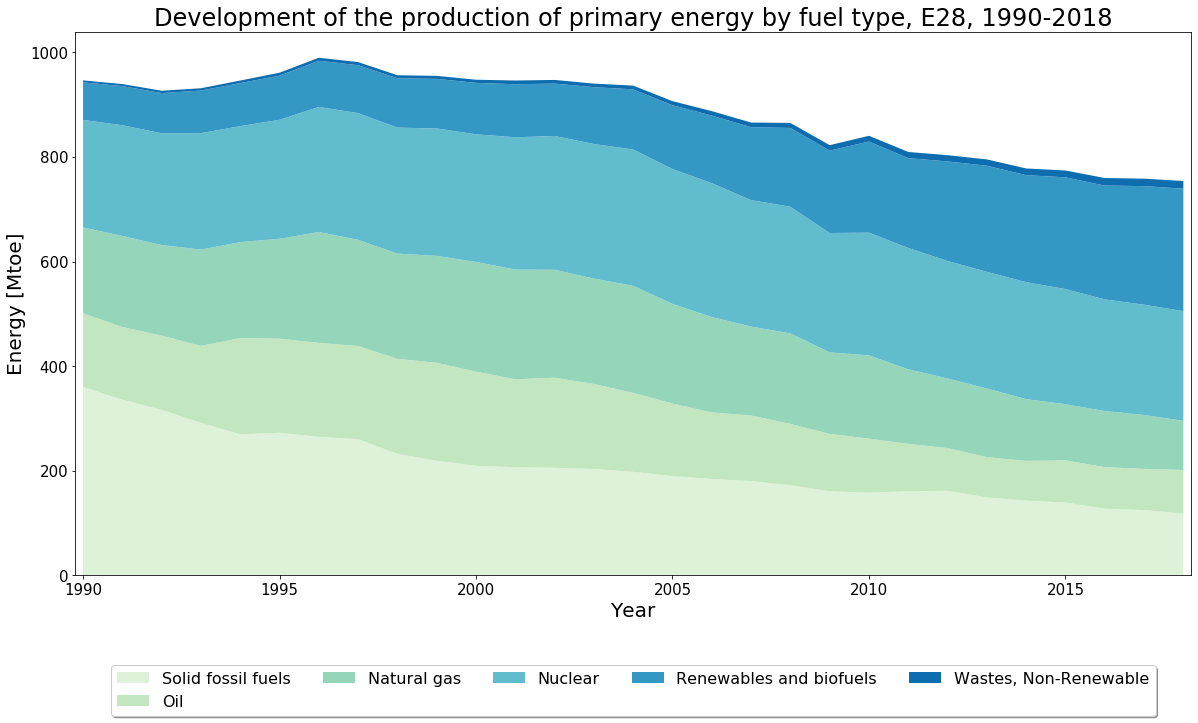

In [9]:
# Save a palette to a variable:
palette = sns.color_palette("GnBu")


x = energy_balance['Year']
#y1 = energy_production['Production']
y2 = energy_balance['Solid fossil fuels']
y3 = energy_balance['Oil']
y4 = energy_balance['Natural gas']
y5 = energy_balance['Nuclear']
y6 = energy_balance['Renewables and biofuels']
y7 = energy_balance['Wastes, Non-Renewable']


y = np.vstack([y2, y3,y4,y5,y6,y7])

labels = [ 'Solid fossil fuels', 'Oil','Natural gas', 'Nuclear','Renewables and biofuels', 'Wastes, Non-Renewable' ]

fig, ax = plt.subplots(figsize=(20,10))

plt.ylabel('Energy [Mtoe]',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Development of the production of primary energy by fuel type, E28, 1990-2018',fontsize=24)
plt.xlim(1989.8, 2018.2)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.stackplot(x, y, labels=labels, colors=palette)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=16)
plt.show()


The EU's primary energy production has decreased in the last 15 years. Nuclear continues to be an important energy source for the European economy. The contribution of renewable energy sources is constantly increasing, surpassing the solid fossil fuels in 2011.

# Development of renewable Energy in EU <a class="anchor" id="devrenewables"></a>

This article provides an overview of the status quo of renewable energy deployment.

In [10]:
# New data frame for renewable energy
renewable_energy= df.iloc[:,12:19]
renewable_energy.dtypes

0
Hydro                 object
Wind                  object
Solar photovoltaic    object
Solar thermal         object
Solid biofuels        object
Biogases              object
Liquid biofuels       object
dtype: object

In [11]:
# Einige Tabellen als Int speichern --> Dictionary
renewable_energy=renewable_energy.astype('float64')
renewable_energy.dtypes

0
Hydro                 float64
Wind                  float64
Solar photovoltaic    float64
Solar thermal         float64
Solid biofuels        float64
Biogases              float64
Liquid biofuels       float64
dtype: object

In [12]:
renewable_energy['Solar'] = renewable_energy['Solar photovoltaic']+renewable_energy['Solar thermal']
renewable_energy=renewable_energy.drop(['Solar photovoltaic','Solar thermal'], axis=1)
renewable_energy.head(5)

,Hydro,Wind,Solid biofuels,Biogases,Liquid biofuels,Solar
0,24.94,0.07,40.62,0.67,0.01,0.16
1,25.93,0.09,42.37,0.72,0.01,0.18
2,27.05,0.13,42.89,0.84,0.02,0.20
3,27.66,0.20,46.30,0.94,0.05,0.21
4,28.61,0.30,46.05,1.02,0.13,0.23


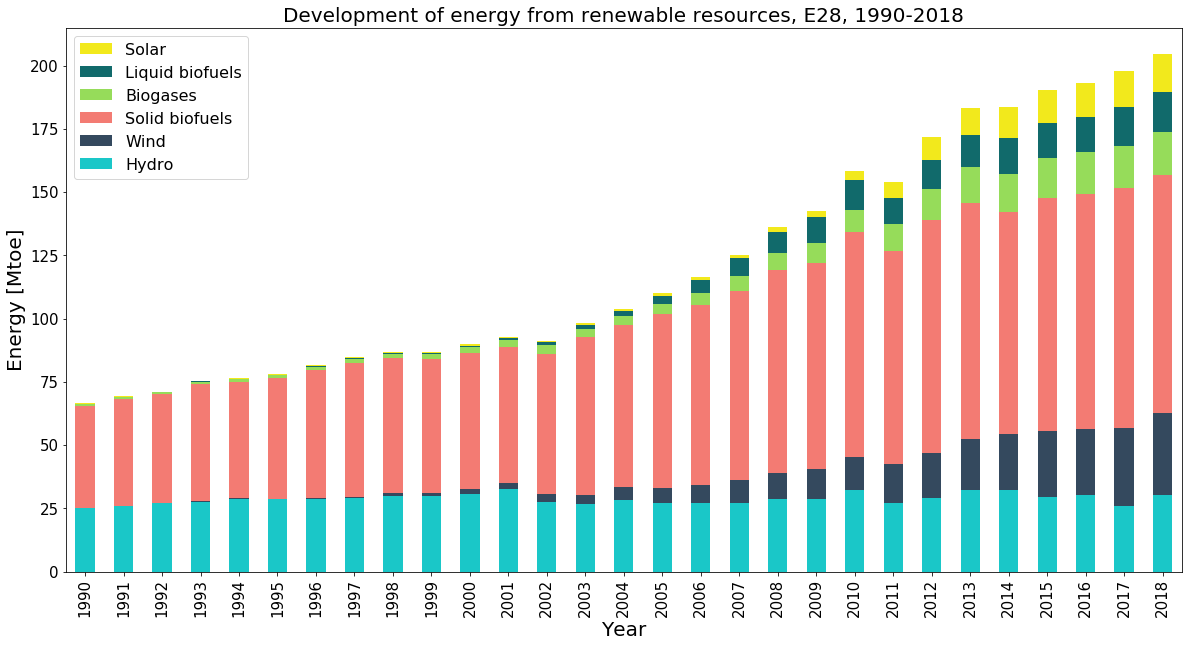

In [13]:
from matplotlib.colors import ListedColormap

colors=["#1ac7c8", "#34495e", "#f37b73", "#96dc5a", "#116a6b", "#f2e91c"]

sns.set_palette(colors)
renewable_energy.index = df['Year']
ax= renewable_energy.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(colors)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('Development of energy from renewable resources, E28, 1990-2018',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Energy [Mtoe]', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)

The graph shows the timely evolution of the renweable energy production in the period 1990 to 2018. First thing to notice is the strong overall increase in production. In addition further details can be identified. While hydro energy was already quite high in 1990, there has been only a minor growth until 2018. In contrast, a significant increase of solar and wind energy can be seen. The major constituent is still solid biofuels with more than 50% of the overall renewable energy production.

# Evolution of the renewables share in net public electricity generation<a class="anchor" id="evolutionrenewables"></a>


This article provides recent statistics on the net electricity generation from renewable resources for the public power supply. 

In [14]:
# New DataFrame fro electricity production
electricity_production=df.iloc[:,222:243]
electricity_production.head()

,"Gross Electricity Generation, by Fuel [TWh]","Solid fossil fuels, peat and products, oil shale and oil sands",of which hard coal,of which brown coal,Oil and petroleum products,Natural gas and manufactured gas,of which natural gas,Nuclear,Renewables and biofuels,Hydro,...,Solid biofuels and renewable wastes,Biogases,Liquid biofuels,Solar,Geothermal,"Tide, Wave and Ocean",Wastes non-RES,Other,Main Activity Electricity Only,Main Activity CHP Plants
0,2594.78,1019.43,651.75,345.49,224.2,223.43,192.56,794.86,327.57,308.71,...,13.42,0.91,0,0.02,3.23,0.5,5.29,0,1998.81,365.02
1,2639.6,1022.62,670.94,332.32,232.02,217.53,188.35,819.84,341.68,321.72,...,13.94,1.19,0,0.02,3.19,0.52,5.93,0,2041.01,371.11
2,2623.42,976.57,621.71,336.37,241.52,213.53,185.14,827.32,357.91,336.34,...,14.67,1.32,0,0.03,3.46,0.52,6.57,0,2056.94,336.55
3,2625.67,933.23,582.42,335.23,218.81,239.53,213.18,862.17,365.1,340.91,...,15.95,1.69,0,0.03,3.67,0.49,6.84,0,2063.26,332.78
4,2666.28,936.34,587.03,332.31,215.11,270.72,245.02,858.72,377.32,350.81,...,17.15,1.87,0,0.04,3.45,0.5,8.07,0,2090.75,336.97


In [15]:
electricity_production.dtypes
electricity_production=electricity_production.astype('float64')
electricity_production.dtypes

0
Gross Electricity Generation, by Fuel  [TWh]                      float64
Solid fossil fuels, peat and products, oil shale and oil sands    float64
of which hard coal                                                float64
of which brown coal                                               float64
Oil and petroleum products                                        float64
Natural gas and manufactured gas                                  float64
of which natural gas                                              float64
Nuclear                                                           float64
Renewables and biofuels                                           float64
Hydro                                                             float64
Wind                                                              float64
Solid biofuels and renewable wastes                               float64
Biogases                                                          float64
Liquid biofuels                     

In [16]:
electricity_production.head()

,"Gross Electricity Generation, by Fuel [TWh]","Solid fossil fuels, peat and products, oil shale and oil sands",of which hard coal,of which brown coal,Oil and petroleum products,Natural gas and manufactured gas,of which natural gas,Nuclear,Renewables and biofuels,Hydro,...,Solid biofuels and renewable wastes,Biogases,Liquid biofuels,Solar,Geothermal,"Tide, Wave and Ocean",Wastes non-RES,Other,Main Activity Electricity Only,Main Activity CHP Plants
0,2594.78,1019.43,651.75,345.49,224.20,223.43,192.56,794.86,327.57,308.71,...,13.42,0.91,0.0,0.02,3.23,0.50,5.29,0.0,1998.81,365.02
1,2639.60,1022.62,670.94,332.32,232.02,217.53,188.35,819.84,341.68,321.72,...,13.94,1.19,0.0,0.02,3.19,0.52,5.93,0.0,2041.01,371.11
2,2623.42,976.57,621.71,336.37,241.52,213.53,185.14,827.32,357.91,336.34,...,14.67,1.32,0.0,0.03,3.46,0.52,6.57,0.0,2056.94,336.55
3,2625.67,933.23,582.42,335.23,218.81,239.53,213.18,862.17,365.10,340.91,...,15.95,1.69,0.0,0.03,3.67,0.49,6.84,0.0,2063.26,332.78
4,2666.28,936.34,587.03,332.31,215.11,270.72,245.02,858.72,377.32,350.81,...,17.15,1.87,0.0,0.04,3.45,0.50,8.07,0.0,2090.75,336.97


In [17]:
electricity_production.rename(columns={electricity_production.columns[0]:'Electricity Generation',
                                       electricity_production.columns[1]:'Fossil fuels and Oil',
                                       electricity_production.columns[11]:'Solid Fuels and renewable wastes'},
                              inplace=True)


In [18]:
electricity_production.head()

,Electricity Generation,Fossil fuels and Oil,of which hard coal,of which brown coal,Oil and petroleum products,Natural gas and manufactured gas,of which natural gas,Nuclear,Renewables and biofuels,Hydro,...,Solid Fuels and renewable wastes,Biogases,Liquid biofuels,Solar,Geothermal,"Tide, Wave and Ocean",Wastes non-RES,Other,Main Activity Electricity Only,Main Activity CHP Plants
0,2594.78,1019.43,651.75,345.49,224.20,223.43,192.56,794.86,327.57,308.71,...,13.42,0.91,0.0,0.02,3.23,0.50,5.29,0.0,1998.81,365.02
1,2639.60,1022.62,670.94,332.32,232.02,217.53,188.35,819.84,341.68,321.72,...,13.94,1.19,0.0,0.02,3.19,0.52,5.93,0.0,2041.01,371.11
2,2623.42,976.57,621.71,336.37,241.52,213.53,185.14,827.32,357.91,336.34,...,14.67,1.32,0.0,0.03,3.46,0.52,6.57,0.0,2056.94,336.55
3,2625.67,933.23,582.42,335.23,218.81,239.53,213.18,862.17,365.10,340.91,...,15.95,1.69,0.0,0.03,3.67,0.49,6.84,0.0,2063.26,332.78
4,2666.28,936.34,587.03,332.31,215.11,270.72,245.02,858.72,377.32,350.81,...,17.15,1.87,0.0,0.04,3.45,0.50,8.07,0.0,2090.75,336.97


In [19]:
electricity_production=electricity_production.drop(['Fossil fuels and Oil',
                                                    'of which hard coal','of which brown coal',
                                                    'Oil and petroleum products','Natural gas and manufactured gas',
                                                    'of which natural gas','Nuclear',
                                                    'Wastes non-RES','Other'],axis=1)


In [20]:
electricity_production.head()

,Electricity Generation,Renewables and biofuels,Hydro,Wind,Solid Fuels and renewable wastes,Biogases,Liquid biofuels,Solar,Geothermal,"Tide, Wave and Ocean",Main Activity Electricity Only,Main Activity CHP Plants
0,2594.78,327.57,308.71,0.78,13.42,0.91,0.0,0.02,3.23,0.50,1998.81,365.02
1,2639.60,341.68,321.72,1.10,13.94,1.19,0.0,0.02,3.19,0.52,2041.01,371.11
2,2623.42,357.91,336.34,1.56,14.67,1.32,0.0,0.03,3.46,0.52,2056.94,336.55
3,2625.67,365.10,340.91,2.36,15.95,1.69,0.0,0.03,3.67,0.49,2063.26,332.78
4,2666.28,377.32,350.81,3.49,17.15,1.87,0.0,0.04,3.45,0.50,2090.75,336.97


In [21]:
# Create new column that ...
electricity_production['Renewables Rest']= electricity_production['Renewables and biofuels'] -(electricity_production['Wind']+electricity_production['Solar'])

In [22]:
# New DataFrame for share of renewables
renwables_production=electricity_production.filter(['Renewables and biofuels','Wind','Solar','Renewables Rest'])
renwables_production.head(5)

,Renewables and biofuels,Wind,Solar,Renewables Rest
0,327.57,0.78,0.02,326.77
1,341.68,1.10,0.02,340.56
2,357.91,1.56,0.03,356.32
3,365.10,2.36,0.03,362.71
4,377.32,3.49,0.04,373.79


In [23]:
# Create new colums for
# Share of total energy from renewables 
electricity_production['Renewables']=(electricity_production['Renewables and biofuels']/electricity_production['Electricity Generation'])*100
# Share of wind production
electricity_production['Wind']=(electricity_production['Wind']/electricity_production['Electricity Generation'])*100
# Share of Solar
electricity_production['Solar']=(electricity_production['Solar']/electricity_production['Electricity Generation'])*100
# Share of rest 
electricity_production['Rest']=(electricity_production['Renewables Rest']/electricity_production['Electricity Generation'])*100

In [24]:
#share_renewables=electricity_production.filter(['Renewables','Wind','Solar','Rest'])
share_renewables=electricity_production.filter(['Wind','Solar','Rest'])
share_renewables.tail(15)

,Wind,Solar,Rest
14,1.803578,0.020930,13.009057
15,2.141121,0.044330,12.798174
16,2.464323,0.074280,12.966072
17,3.111991,0.112136,13.072255
18,3.557242,0.220185,13.829680
19,4.157413,0.438603,14.926180
20,4.465045,0.691780,15.994813
21,5.485515,1.438015,14.529612
22,6.285740,2.168824,15.816682
23,7.264581,2.629811,17.339466


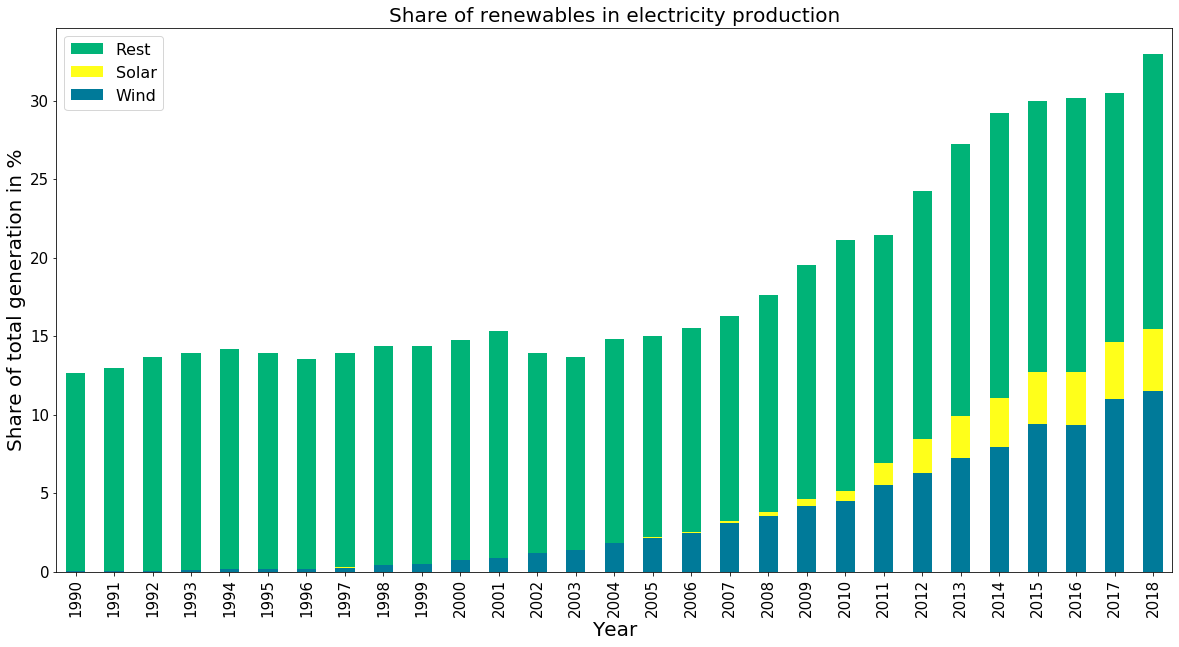

In [25]:
from matplotlib.colors import ListedColormap

color=['#007a99','#ffff1a','#00b377']

sns.set_palette(colors)
share_renewables.index = df['Year']
ax= share_renewables.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(color)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('Share of renewables in electricity production',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Share of total generation in %', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)


The share of renewable energy resources within the EU power generation mix  has been rising quickly since the end of the 2000’s. The share of renewable energy in total energy production increased from 17.6 % percent in 2008 to ca. 33% in 2018, meaning they cover 33% of the power mix in Europe. 

The quantity of electricity generated in the EU from solar and from wind was 15.5 times and 2.9 times as high in 2018 as it had been in 2008. The growth in electricity from solar power has been dramatic, rising from just 7.4 TWh in 2008 to 115.0 TWh in 2018.

# Electricity production from renewable resources in the EU countries (2018)<a class="anchor" id="renewableseu"></a>


This article provides recent statistics on the share of the energy from renewable resources in the EU member states

In [26]:
numbersheets = 28
df_results = pd.DataFrame({'Country':range(numbersheets), 
                           'Share Renewables':range(numbersheets),
                           'Share Wind':range(numbersheets),
                           'Share Solar':range(numbersheets),
                           'Share Rest':range(numbersheets)})

startsheet = 2
year = 2018
yearindex = year-1990+3
for i in range(numbersheets):
    df1 = pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    df_results.iloc[i,0]=df1.iloc[4,3]
    df_results.iloc[i,1]= (df1.iloc[266,yearindex]/df1.iloc[257,yearindex]*100) # Renewables Total
    df_results.iloc[i,2]= (df1.iloc[268,yearindex]/df1.iloc[257,yearindex]*100) #Wind
    df_results.iloc[i,3]= (df1.iloc[272,yearindex]/df1.iloc[257,yearindex]*100) #Solar
    df_results.iloc[i,4]= (df_results.iloc[i,1]-(df_results.iloc[i,2]+df_results.iloc[i,3])) #Rest


df_results.head(5)


,Country,Share Renewables,Share Wind,Share Solar,Share Rest
0,EU28,32.987797,11.534101,3.906840,17.546857
1,BE,24.353304,9.998660,5.227181,9.127463
2,BG,20.461341,2.819308,2.862025,14.780009
3,CZ,11.921283,0.693891,2.684564,8.542828
4,DK,68.367347,45.753785,3.127057,19.486504


In [27]:
df_results=df_results.filter(['Country','Share Wind','Share Solar','Share Rest'])
df_results.head()

,Country,Share Wind,Share Solar,Share Rest
0,EU28,11.534101,3.906840,17.546857
1,BE,9.998660,5.227181,9.127463
2,BG,2.819308,2.862025,14.780009
3,CZ,0.693891,2.684564,8.542828
4,DK,45.753785,3.127057,19.486504


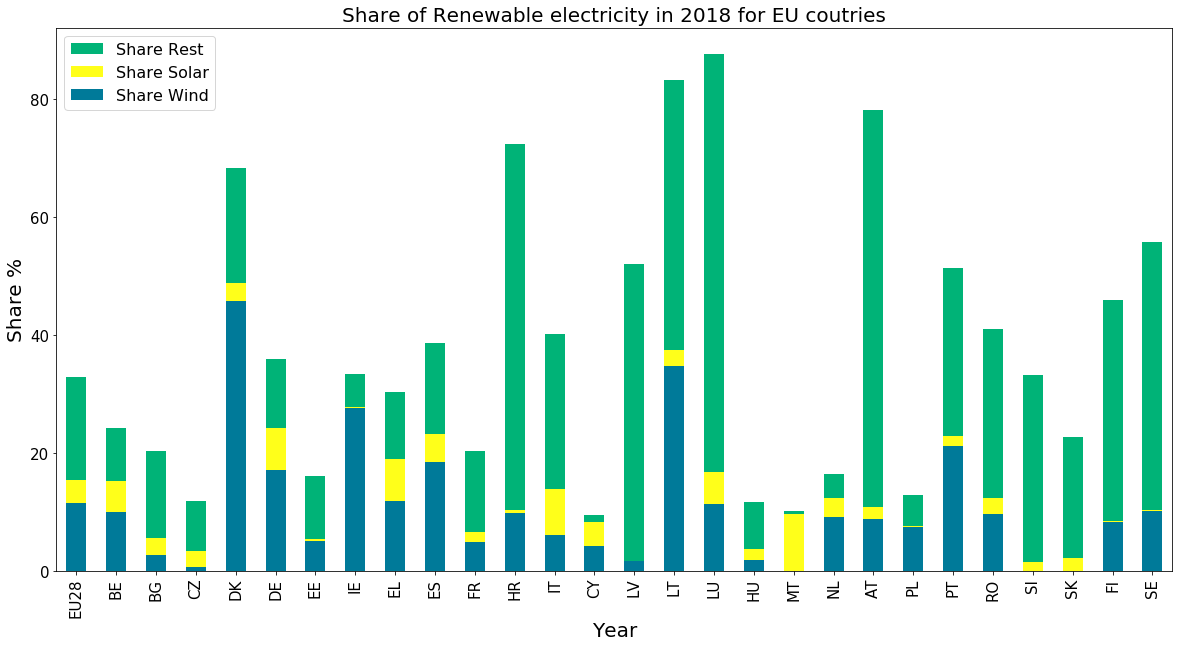

In [28]:
from matplotlib.colors import ListedColormap

color=['#007a99','#ffff1a','#00b377']

sns.set_palette(colors)
df_results.index = df_results['Country']
ax= df_results.plot(kind='bar', stacked=True,
                          colormap=ListedColormap(sns.color_palette(color)),
                          fontsize=15,
                          figsize=(20,10))

ax.set_title('Share of renewable electricityproduction in 2018 for EU coutries',fontsize= 20) # title of plot
ax.set_xlabel('Year',fontsize = 20) #xlabel
ax.set_ylabel('Share %', fontsize = 20)#ylabel


# reverse the order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper left',fontsize=16)

Luxemburg had by far the highest share among the EU Member States in 2018, ahead of Lithuania (82 %), Austria (78%) and Denmark (75 %) 

# Europe’s top five  wind and solar power producing countries<a class="anchor" id="topfive"></a>

This article shows the top five wind and solar power producing EU countries.

In [29]:
numbersheets = 28
df_results2 = pd.DataFrame({'Country':range(numbersheets), 
                           'Installed Capacity':range(numbersheets),
                           'Wind':range(numbersheets),
                           'SolarPV':range(numbersheets),
                           'SolarT':range(numbersheets)})

startsheet = 3
year = 2018
yearindex = year-1990+3
for i in range(numbersheets):
    df2 = pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    df_results2.iloc[i,0]=df2.iloc[4,3]
    df_results2.iloc[i,1]= df2.iloc[283,yearindex] # Renewables Total
    df_results2.iloc[i,2]= df2.iloc[287,yearindex]  #Wind
    df_results2.iloc[i,3]= df2.iloc[288,yearindex] #Solar
    df_results2.iloc[i,4]= df2.iloc[289,yearindex] #Solar

#replacing blank values (white space) with NaN 
df_results2 = df_results2.replace(r'^\s*$', np.nan, regex=True)

df_results2.tail(5)


,Country,Installed Capacity,Wind,SolarPV,SolarT
23,SI,3772.64,5.24,221.33,NaN
24,SK,7625.00,4.00,471.00,NaN
25,FI,17153.74,2041.00,140.00,NaN
26,SE,41223.00,7300.00,428.00,NaN
27,UK,108279.34,21770.38,13118.34,NaN


In [30]:
df_results2['SolarT'] = df_results2['SolarT'].fillna(0)
#df_results2.head(5)

In [31]:
df_results2.dtypes

Country                object
Installed Capacity    float64
Wind                  float64
SolarPV               float64
SolarT                float64
dtype: object

In [32]:
df_results2['Solar']=df_results2['SolarPV']+df_results2['SolarT']

In [33]:
df_results2=df_results2.drop(columns=['SolarPV','SolarT'],axis=1)

In [34]:
df_results2.tail(8)

,Country,Installed Capacity,Wind,Solar
20,PL,43045.78,5766.08,561.98
21,PT,21185.56,5172.36,667.43
22,RO,23552.62,3032.26,1385.91
23,SI,3772.64,5.24,221.33
24,SK,7625.00,4.00,471.00
25,FI,17153.74,2041.00,140.00
26,SE,41223.00,7300.00,428.00
27,UK,108279.34,21770.38,13118.34


In [35]:
# Find max Value from column Solar 
max_solar=df_results2.groupby(pd.Grouper(key='Country'))['Solar'].max().sort_values(ascending=False)[:6]
max_solar

Country
DE    45181.00
IT    20107.59
UK    13118.34
FR     9617.03
ES     7067.56
NL     4522.00
Name: Solar, dtype: float64

Germany is the continent’s leader in installed solar capacity (45,2 GW). Italy ranks second with installed solar capacity of 20,1 GW. The UK ranks third with an installed solar capacity of 13.1GW in 2018. 

In [36]:
max_wind=df_results2.groupby(pd.Grouper(key='Country'))['Wind'].max().sort_values(ascending=False)[:6]
max_wind

Country
DE    58843.00
ES    23405.06
UK    21770.38
FR    14900.15
IT    10230.25
SE     7300.00
Name: Wind, dtype: float64

Germany is again the continent’s leader in installed wind capacity (58,84 GW). Spain ranks second with installed wind capacity of 23,4 GW. The UK ranks third with an installed wind capacity of 21.8 GW in 2018. 

# Growth of solar electricity capacity for major EU countries<a class="anchor" id="growthsolar"></a>

This article provides recent statistics on the growth of solar electricity capacity for top 5 EU countries.

In [37]:
numbersheets = 28
startsheet = 3
numberyears = 29
sheetnames = list(max_solar.index)
years= range(numberyears)

df_results4 = pd.DataFrame()
df_results4['Year'] = years

for el in sheetnames:   
    df_results4[el] = years
    
#df_results4
for i in range(numbersheets):
    df4 = pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    name = df4.iloc[4,3]
    if name in sheetnames:
        #j=0
        for j, year in enumerate(range(1990,2019)):
            yearindex = year-1990+3
            df_results4.loc[j,name]= df4.iloc[288,yearindex]

            
for j, year in enumerate(range(1990,2019)):
    df_results4.loc[j,'Year']= year
    
        
df_results4.head(5)


,Year,DE,IT,UK,FR,ES,NL
0,1990,2,4.0,0.0,0.0,3.0,1.0
1,1991,2,5.0,0.0,0.0,3.0,1.0
2,1992,6,8.0,0.0,2.0,4.0,1.0
3,1993,9,12.0,0.0,2.0,4.0,2.0
4,1994,12,14.0,0.0,2.0,4.0,2.0


In [38]:
df_results4.tail(10)

,Year,DE,IT,UK,FR,ES,NL
19,2009,10564,1264.00,27.00,277.00,3423.0,69.0
20,2010,18004,3592.00,95.00,1044.00,3873.0,90.0
21,2011,25914,13131.00,1000.00,3003.57,4283.0,149.0
22,2012,34075,16785.00,1753.00,4358.75,4569.0,369.0
23,2013,36708,18185.00,2937.00,5277.29,4690.0,746.0
24,2014,37898,18594.00,5528.00,6034.42,4697.0,1048.0
25,2015,39222,18901.00,9601.00,7137.52,4704.0,1515.0
26,2016,40677,19283.00,11930.48,7702.08,4713.0,2049.0
27,2017,42291,19682.29,12781.79,8610.44,4723.0,2903.5
28,2018,45179,20107.59,13118.34,9617.03,4763.5,4522.0


In [39]:
xs = list(df_results4['Year'])
type(xs)

list

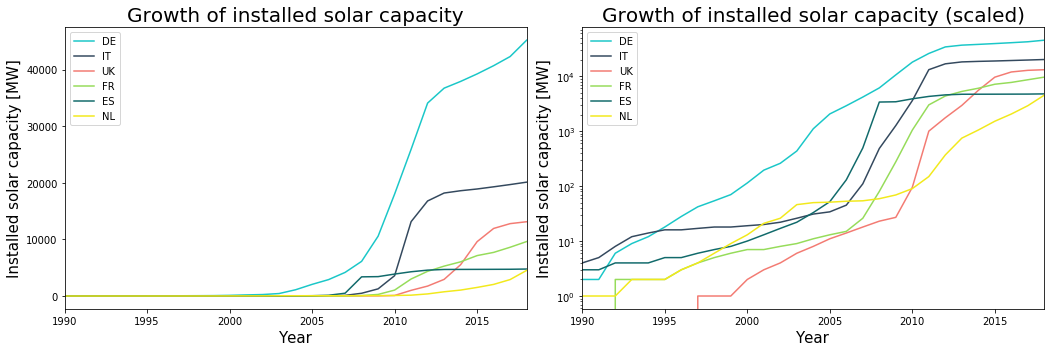

In [40]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the data
df_results4.plot(x='Year',ax=ax1);

# Add title and labels
ax1.set_title("Growth of installed solar capacity",fontsize = 20);
ax1.set_xlabel("Year",fontsize = 15)
ax1.set_ylabel("Installed solar capacity [MW]",fontsize = 15)

# Plot the scaled data 
df_results4.plot(x='Year',logy = True, ax=ax2);

# Add title and labels 
ax2.set_title("Growth of installed solar capacity (log scaled)",fontsize = 20);
ax2.set_xlabel("Year",fontsize = 15)
ax2.set_ylabel("Installed solar capacity [MW]",fontsize = 15)

# Remove empty white space around the plot
plt.tight_layout()

Solar PV has experienced a rapid growth since 2000. In the 15 years from 2003 to 2018, PV capacity in Germany rose  from 0.44 GW to 45,18 GW. The log scaled plot shows more details about the startup phase.

# Visualisation of solar energy production in the EU for 2018<a class="anchor" id="geomap"></a>

This article provides a visualisation of the annual solar production in the EU regions.

In [41]:
numbersheets = 28
solar_results = pd.DataFrame({'Country':range(numbersheets), 
                           'Solar photovoltaic':range(numbersheets),
                           'Solar thermal':range(numbersheets)})

startsheet = 2
year = 2018
yearindex = year-1990+3
for i in range(numbersheets):
    data= pd.read_excel('data/countrydatasheets_march_2020.xlsx', sheet_name=i+startsheet)
    solar_results.iloc[i,0]=data.iloc[4,3]   # coutry name
    solar_results.iloc[i,1]= data.iloc[23,yearindex]
    solar_results.iloc[i,2]= data.iloc[24,yearindex]


In [42]:
solar_results.sample(10)

,Country,Solar photovoltaic,Solar thermal
21,PL,0.03,0.06
9,ES,0.68,2.24
11,HR,0.01,0.01
13,CY,0.02,0.07
26,FI,0.01,0.00
15,LT,0.01,0.00
18,MT,0.02,0.01
1,BE,0.34,0.03
0,EU28,10.57,4.38
25,SK,0.05,0.01


In [43]:
solar_results.dtypes

Country                object
Solar photovoltaic    float64
Solar thermal         float64
dtype: object

In [44]:
# New column which represents the total solar production
solar_results['Solar total'] = solar_results['Solar photovoltaic']+ solar_results['Solar thermal']

# Droping the obsolate columns 
solar_results=solar_results.drop (['Solar photovoltaic','Solar thermal'],axis=1)

In [66]:
solar_results.head()

,NUTS_ID,Solar total
0,EU28,14.95
1,BE,0.37
2,BG,0.14
3,CZ,0.22
4,DK,0.15
5,DE,4.70
6,EE,0.00
7,IE,0.01
8,EL,0.61
9,ES,2.92


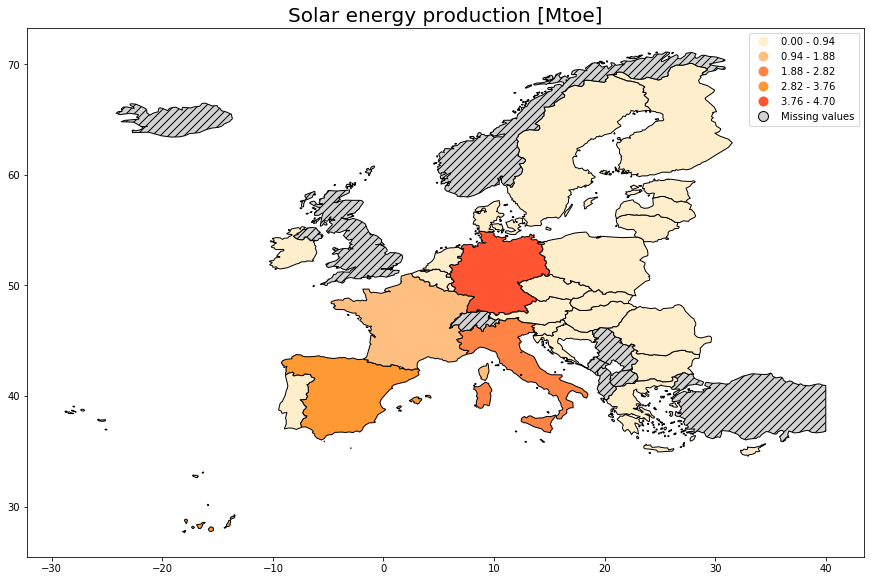

In [67]:
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap

# Reading the european map
nuts=gpd.read_file('img/NUTS_RG_20M_2016_4326_LEVL_0.shp')

# Create a custom polygon for clipping
polygon = Polygon([(-30, 20), (-30, 90), (40,90), (40, 20)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=nuts.crs)

# Renaming the column so that they can be merged 
solar_results=solar_results.rename(columns={'Country':'NUTS_ID'})
# Merging the solar data with the map data.
europe_solar = pd.merge(nuts, solar_results, how='left', on='NUTS_ID')

# Clipped to the regions of interesst 
europe_clipped = gpd.clip(europe_solar, polygon)

# Create custom color palette
colors=["#ffeecc", "#ffbf80","#ffa447", "#ff8547","#ff9933","#ff5533"]

# Plot the clipped data
# Missing data is also shown 
ax= europe_clipped.plot(column='Solar total',scheme='equalinterval', edgecolor="black",
                        legend=True,
                        cmap=ListedColormap(sns.color_palette(colors)),
                        figsize=(15, 10),
                        missing_kwds={'color': 'lightgrey',"hatch": "///","label": "Missing values",}) 

ax.set_title("Solar energy production [Mtoe]",fontsize = 20);


Despite the moderate solar resource in Germany, Germany is the continent’s leading producer of solar energy with 4.7 Mtoe due to its high installed capacity. Spain ranks second with 2.92 Mtoe. Italy is the third-largest solar energy producer in Europe with 2.17 Mtoe. 

# References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="dataset"></a> The dataset was retrieved on 2020-04-12 from 
https://data.europa.eu/euodp/en/data/dataset/information-on-energy-markets-in-eu-countries-with-national-energy-profiles

[2]<a class="anchor" id="seaborn"></a> Seaborn visualisations were retrieved from https://seaborn.pydata.org

[3]<a class="anchor" id="matplotlib"></a> Matplotlib visualisations were retrieved from https://matplotlib.org

[4]<a class="anchor" id="map"></a> Map visualisations was retrieved from https://geopandas.org

[5] <a class="anchor" id="mapground"></a>Europe regions map NUTS 2016 (1:20 Million) retrieved on 2020-05-25 from https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts

[6]<a class="anchor" id="mapreading"></a> Geomap guidance from https://geopandas.org/io.html;
    https://geopandas.org/mapping.html;
    https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630